<a href="https://colab.research.google.com/github/isaacyeSN/SS2021/blob/main/Day1AM/SS21_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression (Multi-variable)**

**1) Linear model**

## 0. Import necessary modules


In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits import mplot3d
# from sklearn.metrics import mean_absolute_error
# import argparse
# import time

## 1. Data preparation

Preparing data for linear regression. Data made of combining $sin(x)$ and $log(x)$ with some random error  

$$y = \ 2 sin(x_1) + log({1 \over 2}x_2^2) + e$$  
$$ e \sim \mathcal{N} (0, 0.5) $$

As shown in the equation above, $sin(x)$ and $log(x)$ has different input $x_1$ and $x_2$ to have the output $y$. Therefore, the dataset we have has two input features for one $y$ value which requires **multivariable linear regression**.

---
The function generates total 2400 data and it is split into three parts; training, validation and testing. Each dataset has 1600, 400 and 400 respectively.

**Data Set**  
$$X_{train} \in \mathcal{R}^{1600 \times 2}, Y_{train} \in \mathcal{R}^{1600}$$  
$$X_{val} \in \mathcal{R}^{400 \times 2}, Y_{val} \in \mathcal{R}^{400}$$  
$$X_{test} \in \mathcal{R}^{400 \times 2}, Y_{test} \in \mathcal{R}^{400}$$

### Inspecting dataset

In [ ]:
# ====== Data generation using Numpy ====== #





# ====== Split Dataset ====== #





# ====== Visualize Each Dataset ====== #
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.scatter(train_X[:, 0], train_X[:, 1], train_y, c=train_y, cmap='jet')

ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('y')
ax1.set_title('Train Set Distribution')
ax1.set_zlim(-10, 6)
ax1.view_init(40, -60)
ax1.invert_xaxis()

ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.scatter(val_X[:, 0], val_X[:, 1], val_y, c=val_y, cmap='jet')

ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('y')
ax2.set_title('Validation Set Distribution')
ax2.set_zlim(-10, 6)
ax2.view_init(40, -60)
ax2.invert_xaxis()

ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.scatter(test_X[:, 0], test_X[:, 1], test_y, c=test_y, cmap='jet')

ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_zlabel('y')
ax3.set_title('Test Set Distribution')
ax3.set_zlim(-10, 6)
ax3.view_init(40, -60)
ax3.invert_xaxis()

plt.show()

## 2. Model define  

Linear model is defined as $H(x) = Wx + b$ by calling `nn.Linear` module in PyTorch.

### **Linear Model**   
$$H = \ XW + b \ \ ( W \in \mathcal{R}^{2 \times 1}, b \in \mathcal{R}^{1}, H \in \mathcal{R}^{N \times 1})$$


In [ ]:
# ===== Linear model ===== #

## 3. Simulation Define

`pytorch` has a function named `loss.backward()` to calculate parameter gradients and then `optimizer.step()` can update all parameters using those gradient.

For every a certain amount of iteration, Test Set is tested by comparing the predicted value with true value using Mean Absolute Error. 

$$MAE(Y_{true}, Y_{predict}) = \sum_{i} | \ y_{true}^{(i)} - y_{predict}^{(i)} \ | $$

In [ ]:
def experiment(args):

    # ===== call the model ===== #



    # ====== Loss function ====== #
    


    # ====== Data collection ====== #
    



    # ====== Loop ====== #
    for epoch in range(args.epoch):  
        
        # ====== Train ====== #
        



        
        # ====== Validation ====== #





        # ====== Evaluation ======= #
        if epoch % 20 == 0: 
            



            # ====== Calculate Accuracy ====== #





             
            # ====== True Y Scattering ====== #
            fig = plt.figure(figsize=(15,5))
           
            ax1 = fig.add_subplot(1, 3, 1, projection='3d')
            ax1.scatter(test_X[:, 0], test_X[:, 1], test_y, c=test_y, cmap='jet')
            
            ax1.set_xlabel('x1')
            ax1.set_ylabel('x2')
            ax1.set_zlabel('y')
            ax1.set_zlim(-10, 6)
            ax1.view_init(40, -40)
            ax1.set_title('True test y')
            ax1.invert_xaxis()

            # ====== Predicted Y Scattering ====== #
            ax2 = fig.add_subplot(1, 3, 2, projection='3d')
            ax2.scatter(test_X[:, 0], test_X[:, 1], pred_y, c=pred_y[:,0], cmap='jet')

            ax2.set_xlabel('x1')
            ax2.set_ylabel('x2')
            ax2.set_zlabel('y')
            ax2.set_zlim(-10, 6)
            ax2.view_init(40, -40)
            ax2.set_title('Predicted test y')
            ax2.invert_xaxis()

            # ====== Just for Visualizaing with High Resolution ====== #
            input_x = torch.Tensor(train_X)
            pred_y = model(input_x).detach().numpy() 
            
            ax3 = fig.add_subplot(1, 3, 3, projection='3d')
            ax3.scatter(train_X[:, 0], train_X[:, 1], pred_y, c=pred_y[:,0], cmap='jet')

            ax3.set_xlabel('x1')
            ax3.set_ylabel('x2')
            ax3.set_zlabel('y')
            ax3.set_zlim(-10, 6)
            ax3.view_init(40, -40)
            ax3.set_title('Predicted train y')
            ax3.invert_xaxis()
            
            plt.show()
            print(f'\n Epoch: {epoch}, loss: {loss.item():.4f}')

    return list_epoch, list_train_loss, list_val_loss, list_acc, list_acc_epoch

## 4. Train & Evaluation

In [ ]:
ts = time.time()

seed = 123
np.random.seed(seed)
torch.manual_seed(seed)

# ===== Set hyperparameters ===== #






te = time.time()

print('\n Elapsed time: {} sec'.format(int(te-ts)))

## 5. Report  


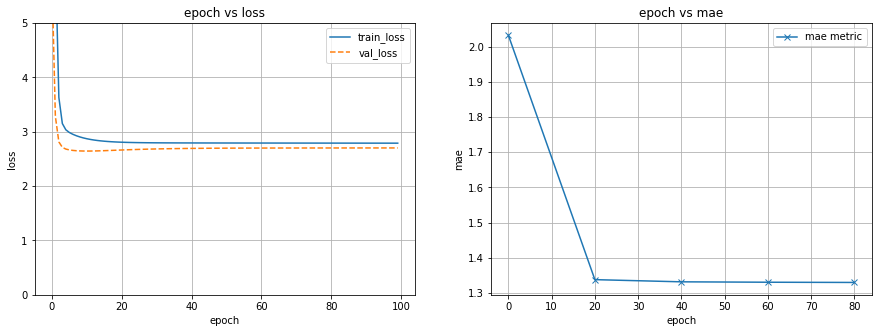

In [ ]:
fig = plt.figure(figsize=(15,5))

# ====== Loss Fluctuation ====== #
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.set_ylim(0, 5)
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

# ====== Metric Fluctuation ====== #
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_acc_epoch, list_acc, marker='x', label='mae metric')

ax2.set_xlabel('epoch')
ax2.set_ylabel('mae')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs mae')


plt.show()